## Semiconductor Device Experiment - Complete

### Load Libraries

In [8]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import factorial
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

# For plotting
import matplotlib.pyplot as plt

### Part 1 - Resistor Analysis
Read 3 columns of data; VE is power supply voltage, V is measured voltage of resistor, I is measure current through the resistor.
Sometimes, reading fails on the different operating system that encodes different scheme (especially PC that has been purchased aborad) so I encode with utf-8 to ensure the system can read our data without failure.

### Plotting the Raw data and Perform Least Square Fit (Revised)
Analyzing data with the consideration of uncertainties (using common uncertainties) and the residuals.

### Reversed and Forward Direction Resistor (COMBINED)

Degrees of freedom (N-2): 20
Intercept estimate with experimental uncertainty: (-0.0003 ± 0.0051) mA
Slope estimate with experimental uncertainty: (1.016 ± 0.002) kOhm

experimental uncertainty, alpha_c : 0.0051 mA
experimental uncertainty, alpha_m : 0.002 kOhm 


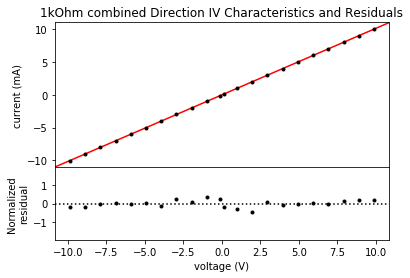

In [9]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

# you can either enter 1kOhm or 10kOhm
chosenR = "1kOhm"

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "combined"

VE1, V1, I1, alpha_V1, alpha_I1 = np.genfromtxt(f"data/2020-10-20-{chosenR}Resistor-reversed.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

VE2, V2, I2, alpha_V2, alpha_I2 = np.genfromtxt(f"data/2020-10-20-{chosenR}Resistor-forward.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')
VE1 = VE1 * -1
V1 = V1 * -1
I1 = I1 * -1

VE = np.concatenate((VE1, VE2), axis=None)
V = np.concatenate((V1, V2), axis=None)
I = np.concatenate((I1, I2), axis=None)
alpha_V = np.concatenate((alpha_V1, alpha_V2), axis=None)
alpha_I = np.concatenate((alpha_I1, alpha_I2), axis=None)

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = V
y = I

#compute DMM uncertainties
# we don't use this since we are taking uncertainties directly from csv file, pre-calculated uncertainties
#alpha_V = 0.005 * np.ones(x.size) * V + 0.01
#alpha_I = 0.008 * np.ones(x.size) * I + 0.01
#print(alpha_V)
#print(alpha_I)

alpha_x = alpha_V
alpha_y = alpha_I

# Number of terms
N = len(x)

# compute c_hat, m_hat
#p, V = np.polyfit(x, y, 1, cov='True') # using common uncertainties
p, V = np.polyfit(x, y, 1, w=1/alpha_y, cov='unscaled') # using DMM uncertainties
m_hat = p[0]
c_hat = p[1]
alpha_m_hat = np.sqrt(V[0][0])
alpha_c_hat = np.sqrt(V[1][1])
alpha_CU = np.sqrt((1/(N-2)) * np.sum( (y - (m_hat*x + c_hat) )**2 ))

# --------------------------------------------------------------------------------------------------
# Residual analysis
# --------------------------------------------------------------------------------------------------

# Make a grid with 2 rows, 1 colum, a 3:1 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [np.min(x) * 1.1, np.max(x) * 1.1]

# Compute the measurement residuals
residuals = y - (m_hat*x + c_hat)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = m_hat*x_model + c_hat

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y, xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.xlim(x_range[0], x_range[1])
plt.ylim(np.min(y) * 1.1, np.max(y) * 1.1)
plt.ylabel(f"{labely}")
plt.title(f"1kOhm {bias} Direction IV Characteristics and Residuals")


# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])

# Make the residual plot with a dotted zero line
# Need to adjust ylim,  yticks, ylabel for readability
ax_res = fig.add_subplot(gs[1])

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.xlim(x_range[0], x_range[1])
plt.ylim(-2, 2)
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")


#Printing Results
# Show optimized fit parameters and uncertainties
print(f"Degrees of freedom (N-2): {N-2:d}")

# results using common uncertainties
print(f"Intercept estimate with experimental uncertainty: ({c_hat:.4f} ± {alpha_c_hat:.4f}) mA")
print(f"Slope estimate with experimental uncertainty: ({m_hat:.3f} ± {alpha_m_hat:.3f}) kOhm")
print()
print(f"experimental uncertainty, alpha_c : {alpha_c_hat:.4f} mA")
print(f"experimental uncertainty, alpha_m : {alpha_m_hat:.3f} kOhm ")

# Show plot
plt.show();

### Part 2 PN Junction-based Diode Analysis (COMBINED - using 982KOhm Resistor)

Fitting was succeeded by combining both forward and reversed direction.Only considering reversed direction was failing and fitting cannot be performed and combining helps fitting on the reverse direction. However, the residual is very high on the forward direction ...

I0 = (0.000000286 ± 0.000000002) mA
n = (1.480 ± 0.001)
R_DMM = (11199 ± 182) kOhm


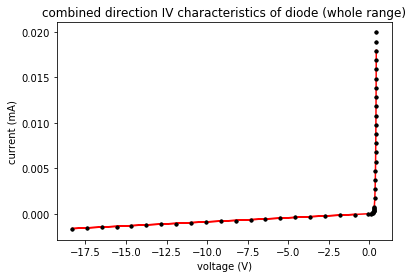

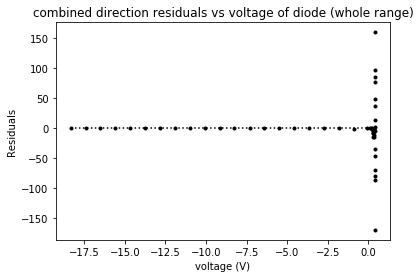

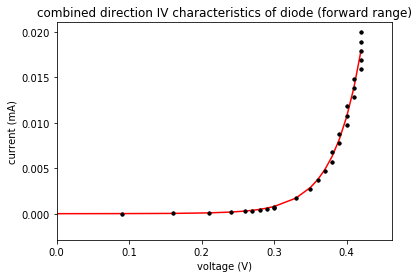

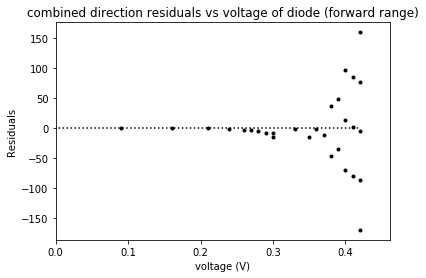

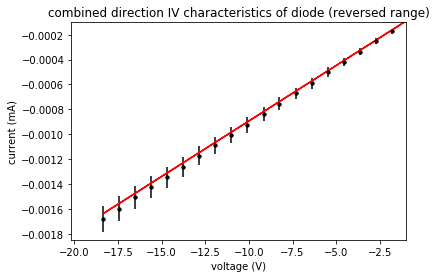

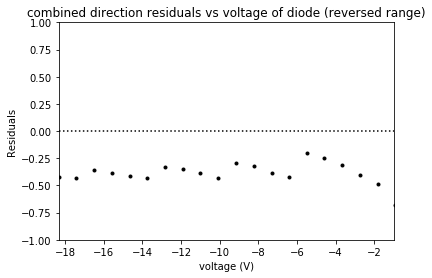

In [41]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "combined"
Rmeas = 0.982e3 # R measured = 0.982 MOhm
k = 8.617333262145e-5 # eV/K
T = 298.0 # Kelvin

VE1, V1, VD1, alpha_V1, alpha_VD1 = np.genfromtxt(f"data/2020-10-20-diode-reversed.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

VE2, V2, VD2, alpha_V2, alpha_VD2 = np.genfromtxt(f"data/2020-10-20-diode-forward.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

I1 = V1 / Rmeas
I2 = V2 / Rmeas
alpha_I1 = alpha_VD1 / Rmeas
alpha_I2 = alpha_VD2 / Rmeas

VE1 = VE1 * -1
VD1 = VD1 * -1
I1 = I1 * -1

VE = np.concatenate((VE1, VE2), axis=None)
V = np.concatenate((VD1, VD2), axis=None)
I = np.concatenate((I1, I2), axis=None)
alpha_V = np.concatenate((alpha_V1, alpha_V2), axis=None)
alpha_I = np.concatenate((alpha_I1, alpha_I2), axis=None)

# print(f"VE = {VE} V")
# print(f"V = {V} V")
# print(f"I = {I} mA")
# print()

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

# inputs
x = V
y = I
alpha_x = alpha_V
alpha_y = alpha_I

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"

def myFunc(x, p0, p1, p2):
    y = p0 * (np.exp(x / (p1 * k * T)) - 1.0) + x / p2
    return y


pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[0.000001, 1.5, 10e3], # trial and error
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]
p2_opt = pOpt[2]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]
alpha_p2 = alpha_vec[2]

# Show optimized fit parameters and uncertainties
print(f"I0 = ({p0_opt:.9f} ± {alpha_p0:.9f}) mA")
print(f"n = ({p1_opt:.3f} ± {alpha_p1:.3f})")
print(f"R_DMM = ({p2_opt:.0f} ± {alpha_p2:.0f}) kOhm")

# Plot data - whole range
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt, p2_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.title(f'{bias} direction IV characteristics of diode (whole range)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt, p2_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.title(f'{bias} direction residuals vs voltage of diode (whole range)')
plt.show()

# Plot data - forward range
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt, p2_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.xlim(0, np.max(x) * 1.1)
plt.title(f'{bias} direction IV characteristics of diode (forward range)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt, p2_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.xlim(0, np.max(x) * 1.1)
plt.title(f'{bias} direction residuals vs voltage of diode (forward range)')
plt.show()


# Plot data -reversed range
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt, p2_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.xlim(np.min(VD1) * 1.1, np.max(VD1) * 1.1)
plt.ylim(np.min(I1) * 1.1, np.max(I1) * 1.1)
plt.title(f'{bias} direction IV characteristics of diode (reversed range)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt, p2_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.xlim(np.min(VD1), np.max(VD1) * 1.1)
plt.ylim(-1,1)
plt.title(f'{bias} direction residuals vs voltage of diode (reversed range)')
plt.show()

### Part 2 PN Junction-based Diode Analysis (forward - using 982KOhm Resistor) - ONLY FORWARD
We have successfully analyzed with the combined reversed and forward direction, so we don't consider this only forward region.
This analysis is using 2020-10-20-diode-forward.csv data

I0 = (0.00000066 ± 0.00000001) mA
n = (1.460 ± 0.003)


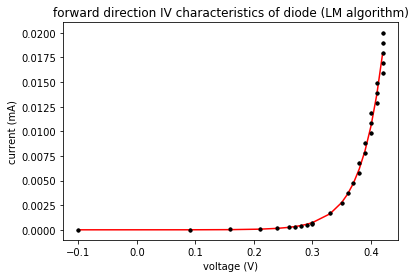

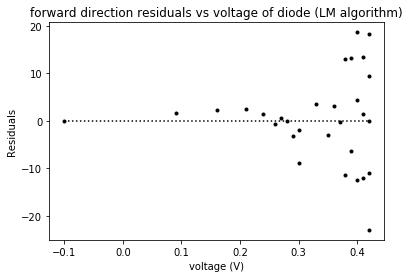

In [39]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "forward"
R_meas = 0.982e3 # R measured = 0.982MOhm = 982kOhm
k = 8.617333262145e-5 # eV/K
T = 298.0 # Kelvin

VE, V, VD, alpha_V, alpha_VD = np.genfromtxt(f"data/2020-10-20-diode-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

I = V / R_meas
alpha_I = alpha_V / R_meas

# print(f"VE = {VE} V")
# print(f"V = {V} V")
# print(f"I = {I} mA")
# print()

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

# inputs
x = VD
y = I
alpha_x = alpha_VD
alpha_y = alpha_I

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"

def myFunc(x, p0, p1):
    y = p0 * (np.exp(x / (p1 * k * T) - 1.0))
    return y

pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[0.00000001, 1.5], # trial and error
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]

# Show optimized fit parameters and uncertainties
print(f"I0 = ({p0_opt:.8f} ± {alpha_p0:.8f}) mA")
print(f"n = ({p1_opt:.3f} ± {alpha_p1:.3f})")


# Plot data
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.title(f'{bias} direction IV characteristics of diode (LM algorithm)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.title(f'{bias} direction residuals vs voltage of diode (LM algorithm)')
plt.show()

### Part 2 PN Junction-based Diode Analysis (only forward region) - ONLY FORWARD
We have successfully analyzed with the combined reversed and forward direction, so we don't consider this only forward region.
This analysis is using 2020-10-20-diode-forward2.csv data

I0 = (0.0000091 ± 0.0000003) mA
n = (1.813 ± 0.004) 


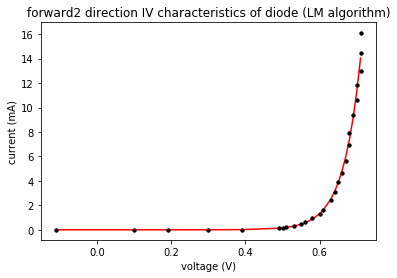

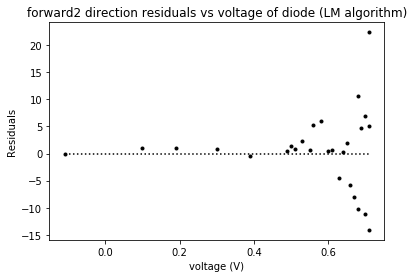

In [40]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"
bias = "forward2"
k = 8.617333262145e-5 # eV/K
T = 298.0 # Kelvin

VE, V, I, alpha_V, alpha_I = np.genfromtxt(f"data/2020-10-20-diode-{bias}.csv", delimiter=',', 
                            unpack=True, skip_header=1, encoding='utf_8_sig')

# print(f"VE = {VE} V")
# print(f"V = {V} V")
# print(f"I = {I} mA")
# print()

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

# inputs
x = V
y = I
alpha_x = alpha_V
alpha_y = alpha_I

#global string for labelling
labely = "current (mA)"
labelx = "voltage (V)"

def myFunc(x, p0, p1):
    y = p0 * (np.exp(x / (p1 * k * T) - 1.0))
    return y


pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[0.000001, 1.5], # trial and error
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]

# Show optimized fit parameters and uncertainties
print(f"I0 = ({p0_opt:.7f} ± {alpha_p0:.7f}) mA")
print(f"n = ({p1_opt:.3f} ± {alpha_p1:.3f}) ")


# Plot data
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt), 'r-')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.title(f'{bias} direction IV characteristics of diode (LM algorithm)')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Residuals')
plt.title(f'{bias} direction residuals vs voltage of diode (LM algorithm)')
plt.show()